## importing needed libraries

In [165]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
import random
import numpy as np
import sys

## loading our dataset

In [166]:
text = []
for i in range(1,10):
    text.append(open(f'/kaggle/input/persian-wikipedia-dataset/Persian-WikiText-{i}.txt', 'rb').read().decode(encoding='UTF-8'))

In [167]:
sub_data = text[1]

In [168]:
len(sub_data)

56255113

In [169]:
sub_data = sub_data.lower()
print(sub_data[:1000])
sub_data = sub_data[:100000]
sub_data = sub_data.replace('\n', ' ')

عنوان مقاله: گروه ام تی ان

گروه ام تی ان یک شرکت ارتباطات همراه چند ملیتی است که در سال ۱۹۹۴ تأسیس گردید و در حال حاضر در ۲۱ کشور آفریقایی و خاورمیانه ای فعالیت دارد. گروه ام. تی. ان در بورس اوراق بهادار جی.اس.ئی (jse) با کد سهام "mtn" ثبت گردیده است. «ام تی ان» آفریقای جنوبی در دو زمینهٔ تلفن همراه پیش و پس پرداختی فعالیت دارد و مجموعاً شمار مشترکین خود را در سی ام سپتامبر ۲۰۰۵ به ۸۹۶۱۰۰۰ نفر رسانده است که از این میان ۷۴۲۱۰۰۰ نفرشان مشترکین خدمات پیش پرداختی هستند. در تاریخ مذکور ۸/۸۲ درصد کل مشترکین «ام تی ان» در آفریقای جنوبی مشترکین تلفن همراه پیش پرداختی بودند.

«ام تی ان» آفریقای جنوبی در ژوئن ۲۰۰۵ خدمات پهن باند (نسل سوم} و
سرعت داده افزایش یافته برای تحول جی اس ام و gprs را راه اندازی کرد و هم اکنون کلان شهرهای اصلی را تحت پوشش خدمات نسل سوم قرار داده است و طبق آمار شرکت بیش از ۳۱ درصد شبکه آفریقای جنوبی مجهز به امکانات سرعت داده افزایش یافته برای تحول جی اس ام است.
ارتباطات داده ای نیز ۳/۶ درصد درآمد کل «ام تی ان» آفریقای جنوبی را تشکیل داده است . اکثریت درآمد داده ای شرکت به

In [170]:
sub_data = ''.join(char for char in sub_data if not char.isdigit())
characters = sorted(list(set(sub_data)))

In [171]:
char_to_int = dict((char, i) for i ,char in enumerate(characters))
int_to_char = dict((i, char) for i ,char in enumerate(characters))
print(len(characters))
characters

99


[' ',
 '"',
 '%',
 '&',
 "'",
 '(',
 ')',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 'a',
 'b',
 'c',
 'd',
 'e',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 '}',
 '«',
 '°',
 '»',
 'ö',
 '،',
 '؛',
 'ء',
 'آ',
 'أ',
 'ؤ',
 'ئ',
 'ا',
 'ب',
 'ة',
 'ت',
 'ث',
 'ج',
 'ح',
 'خ',
 'د',
 'ذ',
 'ر',
 'ز',
 'س',
 'ش',
 'ص',
 'ض',
 'ط',
 'ظ',
 'ع',
 'غ',
 'ف',
 'ق',
 'ل',
 'م',
 'ن',
 'ه',
 'و',
 'ي',
 'ً',
 'ٍ',
 'َ',
 'ُ',
 'ِ',
 'ّ',
 'ْ',
 'ٔ',
 '٪',
 '٫',
 '٬',
 'پ',
 'چ',
 'ژ',
 'ک',
 'گ',
 'ۀ',
 'ی',
 '\u200d',
 '–',
 '‘',
 '’',
 '…']

In [172]:
sente_len = 60
step = 1
sentences = []
next_characters = []
for i in range(0, len(sub_data) - sente_len, step):
    sentences.append(sub_data[i:i + sente_len])
    next_characters.append(sub_data[i + sente_len])
    
print(len(sentences))
sentences[69]

98859


'ملیتی است که در سال  تأسیس گردید و در حال حاضر در  کشور آفری'

In [173]:
x = np.zeros((len(sentences), sente_len, len(characters)), dtype=bool)
y = np.zeros((len(sentences), len(characters)), dtype=bool)

for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_to_int[char]] = 1
    y[i, char_to_int[next_characters[i]]] = 1
    
print(x.shape)
print(y.shape)

(98859, 60, 99)
(98859, 99)


In [174]:
# model = Sequential()
# model.add(LSTM(128,input_shape=(sente_len, len(characters)))
# model.add(Dense((len(characters)), activation='softmax'))
          
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape = (sente_len, len(characters)), return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(characters), activation = 'softmax')
])

In [175]:
optimizer = tf.keras.optimizers.RMSprop(0.01)

In [176]:
model.compile(optimizer= optimizer, loss='categorical_crossentropy')

In [177]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 60, 128)           116736    
_________________________________________________________________
dropout_14 (Dropout)         (None, 60, 128)           0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 99)                12771     
Total params: 261,091
Trainable params: 261,091
Non-trainable params: 0
_________________________________________________________________


In [178]:
print(x.shape)

(98859, 60, 99)


In [179]:

model.fit(x, y, batch_size=128, epochs=50)
model.save('saved_Model.h5')

Epoch 1/50
773/773 [==============================] - 12s 12ms/step - loss: 2.4974
Epoch 2/50
773/773 [==============================] - 9s 12ms/step - loss: 2.0900
Epoch 3/50
773/773 [==============================] - 9s 12ms/step - loss: 1.9791
Epoch 4/50
773/773 [==============================] - 10s 12ms/step - loss: 1.8770
Epoch 5/50
773/773 [==============================] - 9s 12ms/step - loss: 1.8211
Epoch 6/50
773/773 [==============================] - 9s 12ms/step - loss: 1.7825
Epoch 7/50
773/773 [==============================] - 9s 12ms/step - loss: 1.7566
Epoch 8/50
773/773 [==============================] - 9s 12ms/step - loss: 1.7363
Epoch 9/50
773/773 [==============================] - 9s 12ms/step - loss: 1.7192
Epoch 10/50
773/773 [==============================] - 9s 12ms/step - loss: 1.7051
Epoch 11/50
773/773 [==============================] - 9s 12ms/step - loss: 1.6911
Epoch 12/50
773/773 [==============================] - 9s 12ms/step - loss: 1.6812
Epoch 13/50

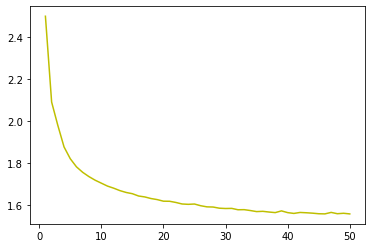

In [180]:
import matplotlib.pyplot as plt
loss = model.history.history['loss']
epoch = range(1, len(loss)+1)
plt.plot(epoch, loss, 'y', label = 'Training loss')
plt.show()

In [181]:
def sample(preds):
    preds = np.asarray(preds.astype('float64'))
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds/np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [182]:
model.load_weights('saved_Model.h5')

In [183]:
def text_prediction(model, text_num, starting_text):
    generated = starting_text
    for i in range(text_num):
        x_pred = np.zeros((1, sente_len, len(characters)))
        for t, char in enumerate(starting_text):
            x_pred[0, t, char_to_int[char]] = 1
        preds = model.predict(x_pred, verbose=0)[0]
        next_ind = sample(preds)
        next_char = int_to_char[next_ind]
        generated += next_char
        starting_text = starting_text[1:] + next_char
    return generated

In [203]:
text_prediction(model, 100, 'ویکی پدیا')

'ویکی پدیااش،له شنر ها)ه رترن nنسانوی نن ثوز  ناق)ح  نهه،هر ار،اارشبو گهههورn منگزد)ه  نثر ن قنe  aهررره.ز ن ل'